In [1]:
# Library Python yang digunakan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [3]:
# Membaca file CSV
data = pd.read_csv('datasetaulia.csv')
print(data)

         NISN                          NAMA  PENGETAHUAN  KETERAMPILAN  \
0    74546407           ADELIA NABILA PUTRI         1695           187   
1    78838217                  AHMAD RAIHAN         1725           177   
2    79415484  ALFA THIAYARA QANIA MANURUNG         1739           178   
3    79819171           ALFAN ZIKRI SARAGIH         1714           195   
4    71922306          AMELIA RAISYA ANJANI         1718           189   
..        ...                           ...          ...           ...   
545  75121870      SITI AZZAHRA BR SIMAMORA         1726           184   
546  61944714                SITI NUR AMINA         1712           185   
547  73641612                  TASYA NOVITA         1761           177   
548  72364393            UMIKALSUM NASUTION         1728           186   
549  75603008                   YUNITA SARI         1739           187   

     JUMLAH  HASIL  
0      1882      0  
1      1902      0  
2      1917      0  
3      1909      1  
4     

In [4]:
# Memisahkan kolom (X) dan label/target (y)
kolom_yang_akan_dihapus = ['HASIL']
X = data.drop(kolom_yang_akan_dihapus, axis=1)
y = data['HASIL']
print(X)
print(y)

         NISN                          NAMA  PENGETAHUAN  KETERAMPILAN  JUMLAH
0    74546407           ADELIA NABILA PUTRI         1695           187    1882
1    78838217                  AHMAD RAIHAN         1725           177    1902
2    79415484  ALFA THIAYARA QANIA MANURUNG         1739           178    1917
3    79819171           ALFAN ZIKRI SARAGIH         1714           195    1909
4    71922306          AMELIA RAISYA ANJANI         1718           189    1907
..        ...                           ...          ...           ...     ...
545  75121870      SITI AZZAHRA BR SIMAMORA         1726           184    1910
546  61944714                SITI NUR AMINA         1712           185    1897
547  73641612                  TASYA NOVITA         1761           177    1938
548  72364393            UMIKALSUM NASUTION         1728           186    1914
549  75603008                   YUNITA SARI         1739           187    1926

[550 rows x 5 columns]
0      0
1      0
2      0
3

In [5]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [6]:
# Menghapus kolom yang tidak digunakan
X_train_penuh = X_train
X_train = X_train.drop(['NISN', 'NAMA'], axis=1)
X_test_penuh = X_test
X_test = X_test.drop(['NISN', 'NAMA'], axis=1)

In [7]:
# Membuat model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [8]:
# Melakukan prediksi
y_pred = model.predict(X_test)
print(y_pred)

[0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0
 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0
 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0
 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1]


In [9]:
# Melakukan evaluasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        90
           1       0.99      0.92      0.95        75

    accuracy                           0.96       165
   macro avg       0.96      0.95      0.96       165
weighted avg       0.96      0.96      0.96       165



In [10]:
# Membuat dataframe dari X_test
result_df = pd.DataFrame(X_test_penuh, columns=X.columns)

# Menambahkan kolom prediksi (y_pred) ke dalam dataframe
result_df['PREDIKSI'] = y_pred

# Menampilkan dataframe hasil
print(result_df)

         NISN                        NAMA  PENGETAHUAN  KETERAMPILAN  JUMLAH  \
85   76442555          FIRJATULLAH RIDWAN         1715           178    1893   
441  73400752            AHMAD ADRIANSYAH         1774           188    1962   
96   81987165              NADYA AZ ZAHRA         1705           179    1884   
172  76599444      QAISHAR SULTHAN SYAFIQ         1717           181    1898   
134  76870398                 MUTIA HAFID         1738           193    1931   
..        ...                         ...          ...           ...     ...   
6    84189622             ANNISA SYAHKIRA         1739           189    1928   
8    77849803  AZZAHRA SHOHI BATUSSALIMAH         1725           183    1908   
357  77929924          NAZWA RIZKA ARIFIN         1687           195    1882   
322  79134026         RAZWA PRATAMA LUBIS         1688           185    1873   
436  75228936     SHADA FATHIMAH NASUTION         1723           188    1911   

     PREDIKSI  
85          0  
441    

In [11]:
# Menyimpan dataframe result_df ke dalam file Excel (xlsx)
result_df.to_excel('hasil_prediksi.xlsx', index=False)

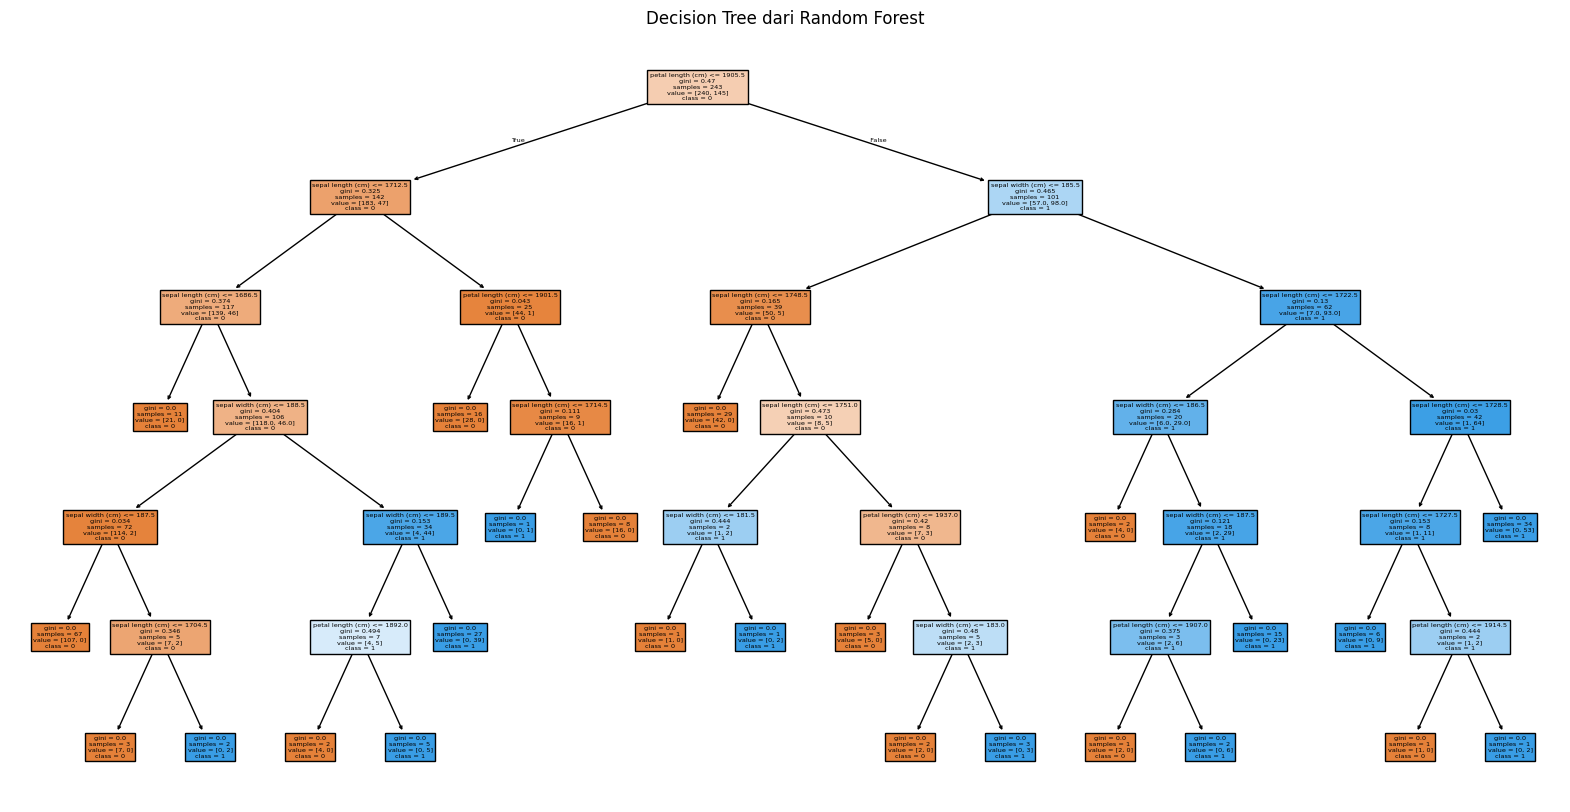

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Ambil salah satu pohon dari RandomForest
estimator = model.estimators_[0]  # Ambil pohon pertama (index 0)

# Plot pohon keputusan
plt.figure(figsize=(20, 10))
plot_tree(estimator, feature_names=X.columns, class_names=y.unique().astype(str), filled=True)
plt.title("Decision Tree dari Random Forest")
plt.show()
